In [80]:
from scipy.stats import expon, norm
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Экспоненциальное распределение с параметром $\lambda$ = 0.5

Плотность $$ f(x) = \lambda e^{-\lambda x}$$
Функция распределения $$F(x) = 1 - e^{-\lambda x}$$

Математическое ожидание равно $\lambda^{-1} = 2,$ дисперсия равна $\lambda^{-2} = 4.$

С помощью библиотеки scipy сгенерируем выборку размером 1000, нужного распределения:

In [24]:
lmbd = 0.5
ex = expon(scale = 1 / lmbd)
sample = ex.rvs(1000)

Построим гистограмму

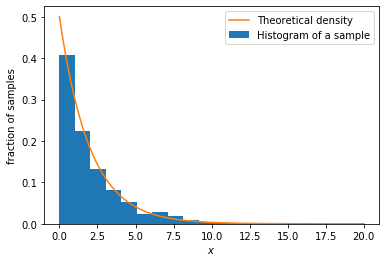

In [102]:
plt.hist(sample, bins=15, density=True, label='Histogram of a sample')
plt.plot(np.linspace(0, 20, 1000), ex.pdf(np.linspace(0, 20, 1000)), label='Theoretical density')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

Для генерации 1000 выборок размером $n$ воспользуемся функцией choice, с параметром replace=False, чтобы уже выбранные значения не повторялись. Рассматриваются значения $n$ равные 5, 10, 50.

Значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних это среднее $\mu = \mathrm{E} X =  \lambda^{-1}$ и дисперсия $\sigma^2 = (\mathrm{D} X) / n = \lambda^{-2} / n$.

Напишем функцию для генерации 1000 выборок объемом $n$, также функция будет строить гистограмму средних сгенерированных выборок.

In [103]:
def mean_hist(sample, n):
    x = np.linspace(0, 5, 1000)
    mu = lmbd**-1
    sigma = math.sqrt(lmbd**-2 / n)

    mean_sample = np.array([np.random.choice(sample, n, replace=False) for _ in range(1000)])
    plt.hist(mean_sample.mean(axis=1), bins=15, density=True, label='Histogram')
    plt.plot(x, norm.pdf(x, mu, sigma), label='Theoretical density')
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.legend()

Далее приведены результаты работы функции для разных $n$:

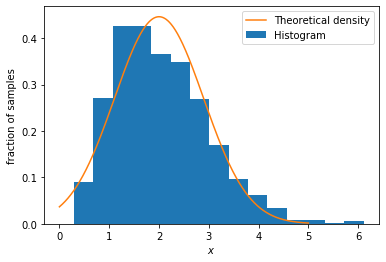

In [107]:
mean_hist(sample, 5)

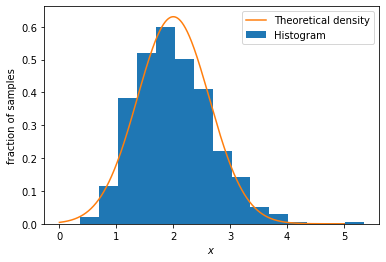

In [108]:
mean_hist(sample, 10)

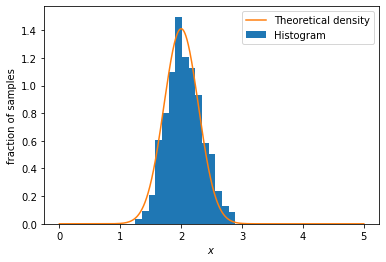

In [109]:
mean_hist(sample, 50)

С увеличением $n$ дисперсия нормальных распределений, которыми согласно ЦПТ можно описать распределения выборочных средних уменьшается, следовательно уменьшаются и отклонения выборочных средних от теоретического среднего распределения.

Из представленных графиков явно видно, что с ростом $n$ приближение по ЦПТ более точное, что логично, ведь по ЦПТ распределение выборочного среднего сходится по распределению к нормальному при $n \rightarrow \infty$.